**Range of 100 value from 0 to 1**

In [10]:
#import mathplotlib.pyplot as plt for ploting later
#reused code from Session 7
import matplotlib.pyplot as plt

#numpy for linspace
import numpy as np
%matplotlib inline

#ranger function takes linspace from 0.0 to 1.0 with 100 values and returns it
def ranger():
    x = np.linspace(0.0,1.0,num = 100)
    return x

**Sin(x) function**

In [11]:
#used a function that takes in x
#This function does the Taylor Series to find the sin of x
#reused from Session 6

def sined(x):
#I have 10^-8 as the place to stop for what to add to it
    number =10**-8

#variables here used for keeping values in track.
#answer is for what is returned
#added is for what will be added or subtracted from it
#factor keeps track if you add or subtract here
#nube is the factorial number
#k is the number we are on for Taylor Series
    answer = 0.0
    added = 1.0
    factor = 1
    nube = 1
    k = 0

#while loop loop until the absolute value of the number added or subtracted is less than 10^-8
    while(added > number):
            #used as a fail safe for zero because we do not want 0 divided by the whole thing
            if(k == 0):
                answer = x
            
            #for all other cases
            else:      
            #nube is multiplied by (2*k+1) and (2*k)
            #done because Taylor series has odd number version for factorial on each entry, so you need the odd and even number multiplied
                nube = nube * (2*k + 1) * (2*k)
            #we make number to add or subtract for the Taylor Series
                added = ((x**(2*k+1)))/nube
            
            #answer is either minus or plus, order alternates, but to keep on track, factor is alternating and multiplied by the added number
                answer += factor*added
            #factor alternates, k is increased by 1
            factor *= -1
            k+=1
    #returns the answer
    return answer


**Cos(x) Function**

In [12]:
#function for cos(x)
#function just is (1-sin(x)**2)**.5
#however we add a check for the range since **.5 gives us the absolute value every time
#First we change x to be less than 2*pi to make sure the range can be checked
#Then we figure out if x scaled down is both less than pi/2 and greater than 3pi/2
#If so, we change the sign of what we return to be negative instead of positive by multiplying it by -1
#Afterwards, we return it
from sympy import pi
def cosined(x):
    y = (1-sined(x)**2)**.5
    z = x
    while(z > 2*pi):
        z -=(2*pi)
    if(z > pi/2 and z < (3*pi)/2):
        y *=-1
    return y

**Multi-Panel Graph**

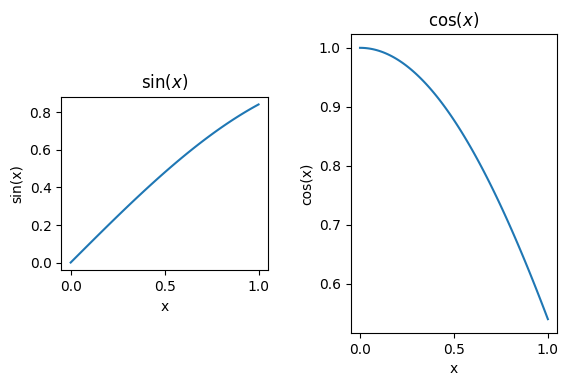

In [14]:
#from multipanel-plots.pdf code
#creates two subplots, 1 row 2 columns
figure,axes = plt.subplots(1,2)

#x stores the 1000 values between 0.0 and 1.0
#y is for the sin for those values
#z is for the cos for those values
x = ranger()
y = []
z = []

#for loop to append sin of each x value to y and the cos of each x value to z
for i in x:
    y.append(sined(i))
    z.append(cosined(i))

#plots x vs sin(x) on left side
#sets labels x to 'x' and y to 'sin(x)' with a title of sin(x)
axes[0].plot(x,y)
axes[0].set_xlabel('x')
axes[0].set_ylabel('sin(x)')
axes[0].set_title(r'$\sin(x)$')


#plots x vs cos(x) on right side
#sets labels x to 'x' and y to 'cos(x)' with a title of cos(x)
axes[1].plot(x,z)
axes[1].set_xlabel('x')
axes[1].set_ylabel('cos(x)')
axes[1].set_title(r'$\cos(x)$')

#gives spacing
figure.subplots_adjust(wspace=0.4)

#changes aspect ratio to where 1 unit of x equaling 1 unit of y on left
axes[0].set_aspect('equal')

#changes asepct ratio to where 1 unit of y is equal to pi units of x
axes[1].set_aspect(np.pi)

#shows the multipanel graphs on screen
#plt.show()
plt.savefig("prompt8.pdf", dpi = 300, bbox_inches="tight")


